In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  country_of_res   800 non-null    object 
 17  used_app_before 

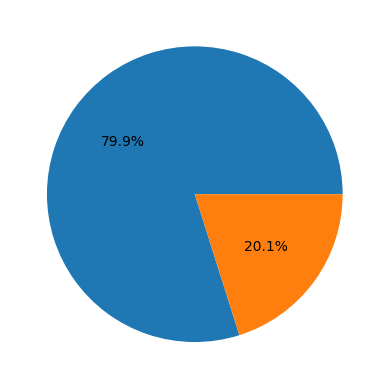

In [ ]:


plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == float:
	  floats.append(col)
  elif df[col].dtype == int:
	  ints.append(col)
  else:
	  objects.append(col)


In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')


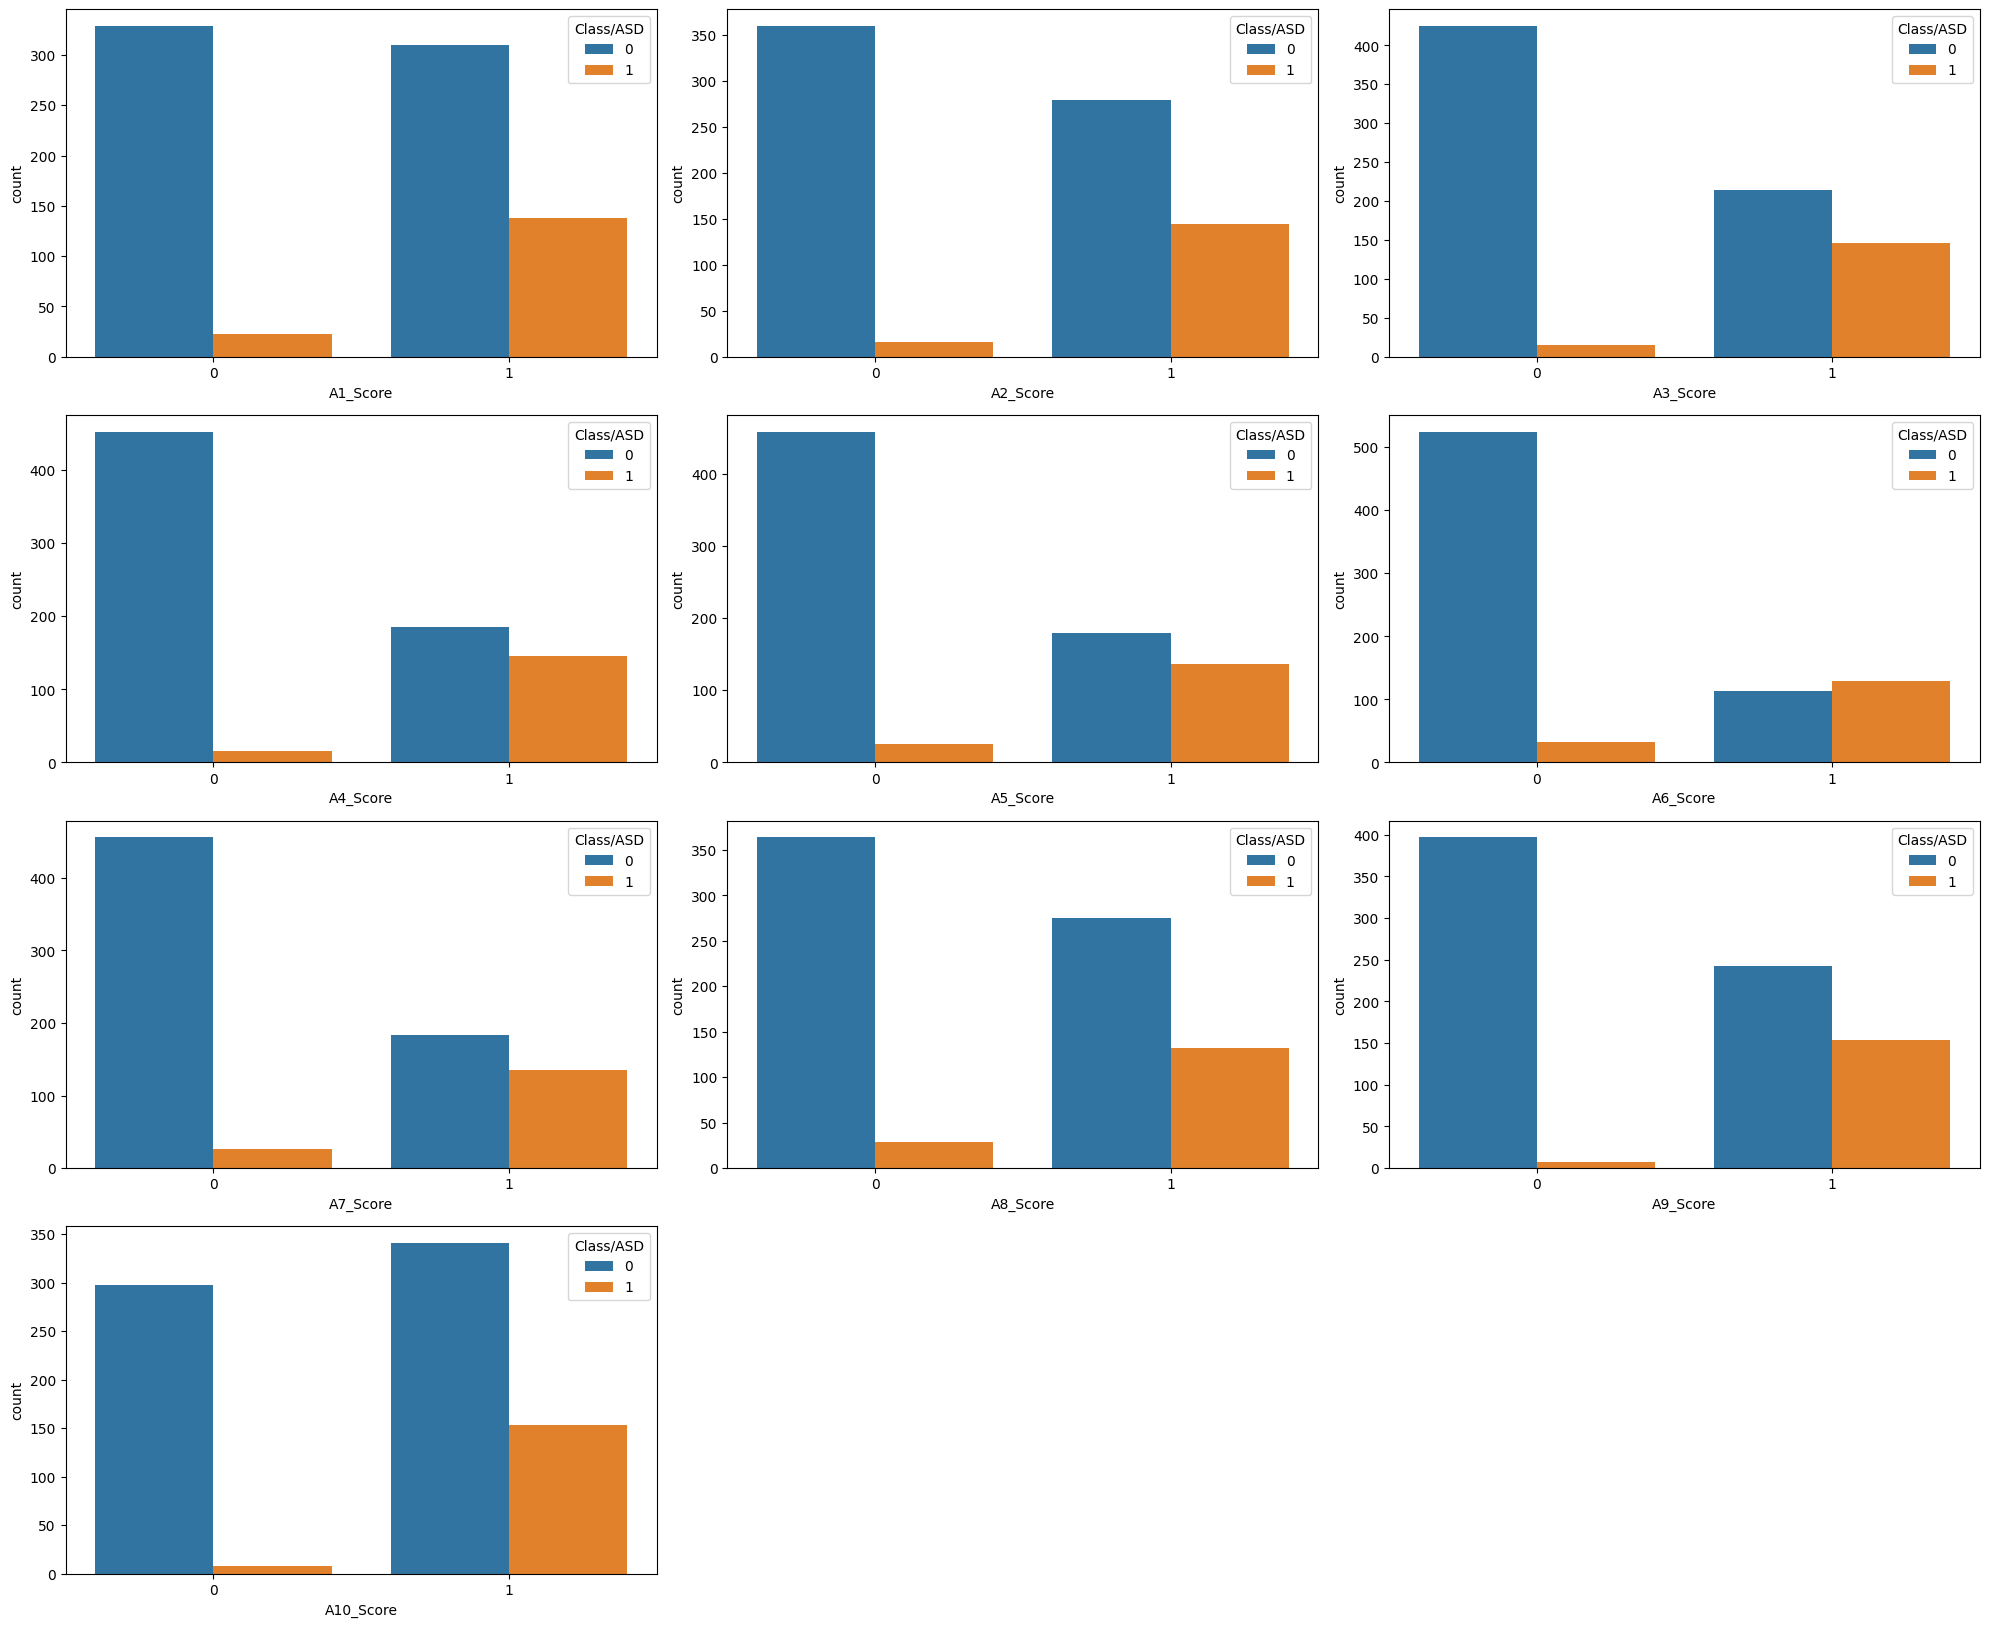

In [ ]:
plt.subplots(figsize=(20,20))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  sb.countplot(x=df[col], hue=df['Class/ASD'])
plt.tight_layout()
plt.show()


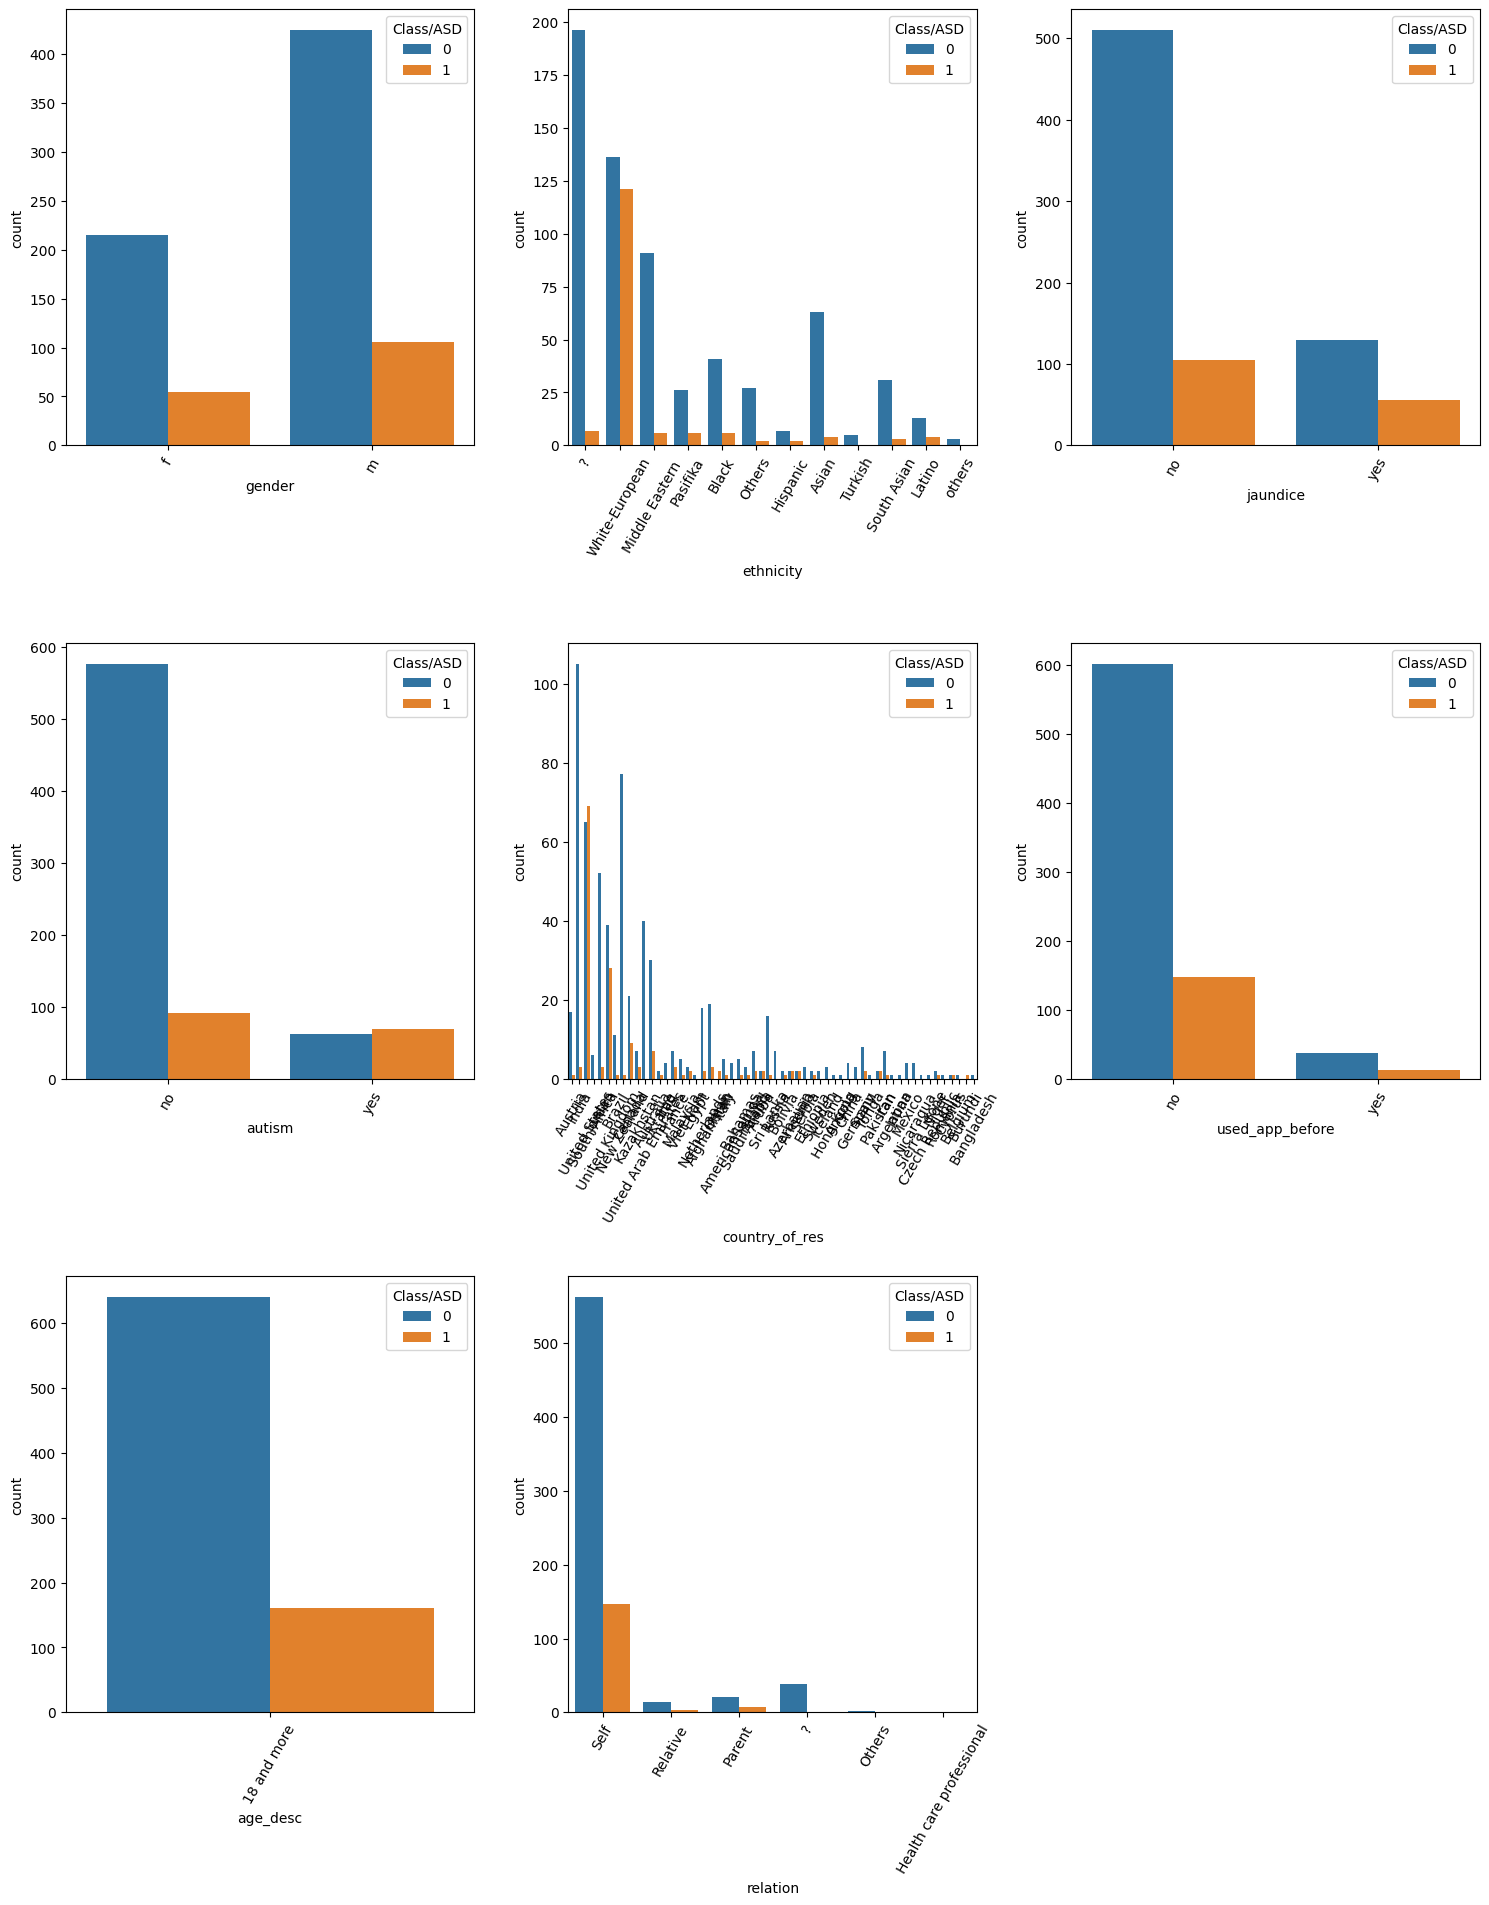

In [ ]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
	plt.subplot(5, 3, i+1)
	sb.countplot(x=df[col], hue=df['Class/ASD'])
	plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


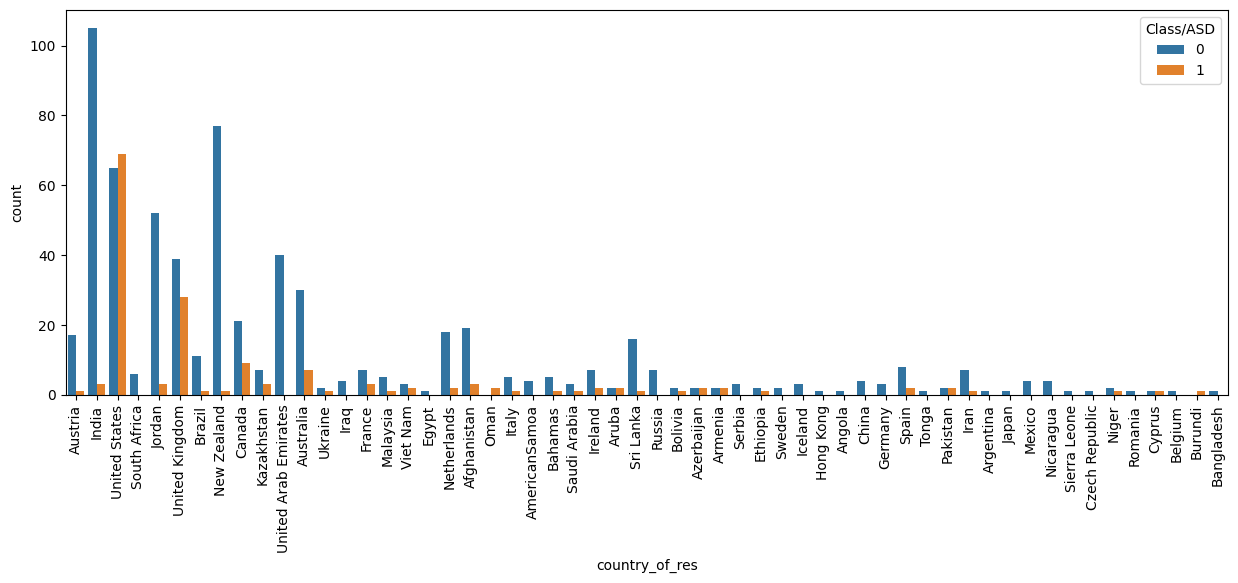

In [ ]:
plt.figure(figsize=(15,5))
sb.countplot(x=df['country_of_res'], hue=df['Class/ASD'])
plt.xticks(rotation=90)
plt.show()


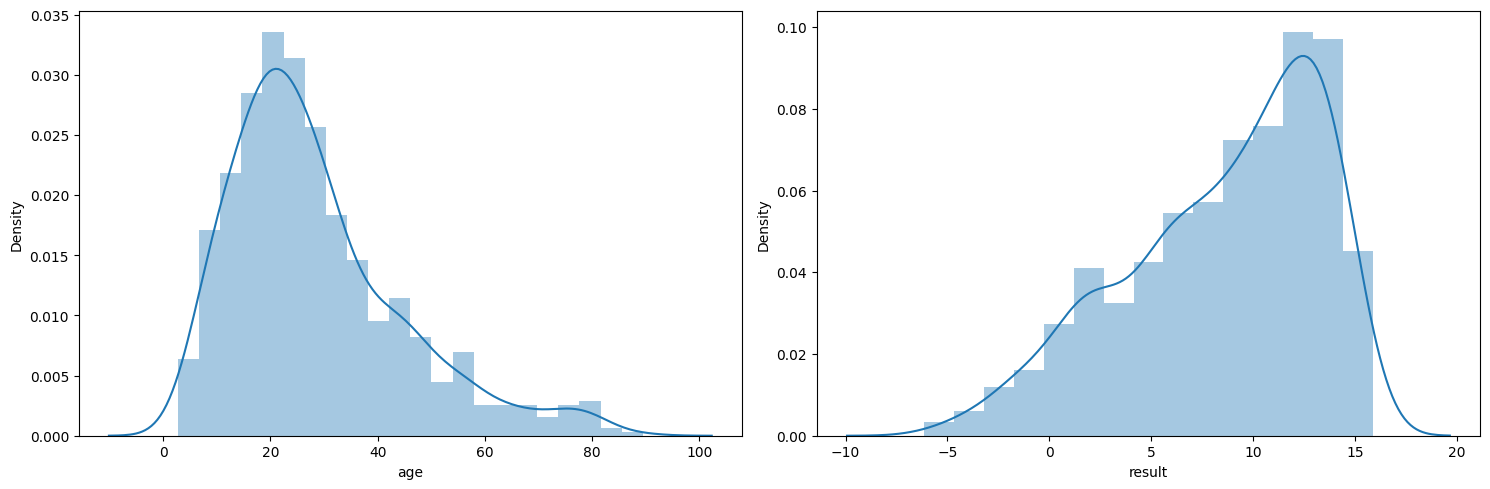

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


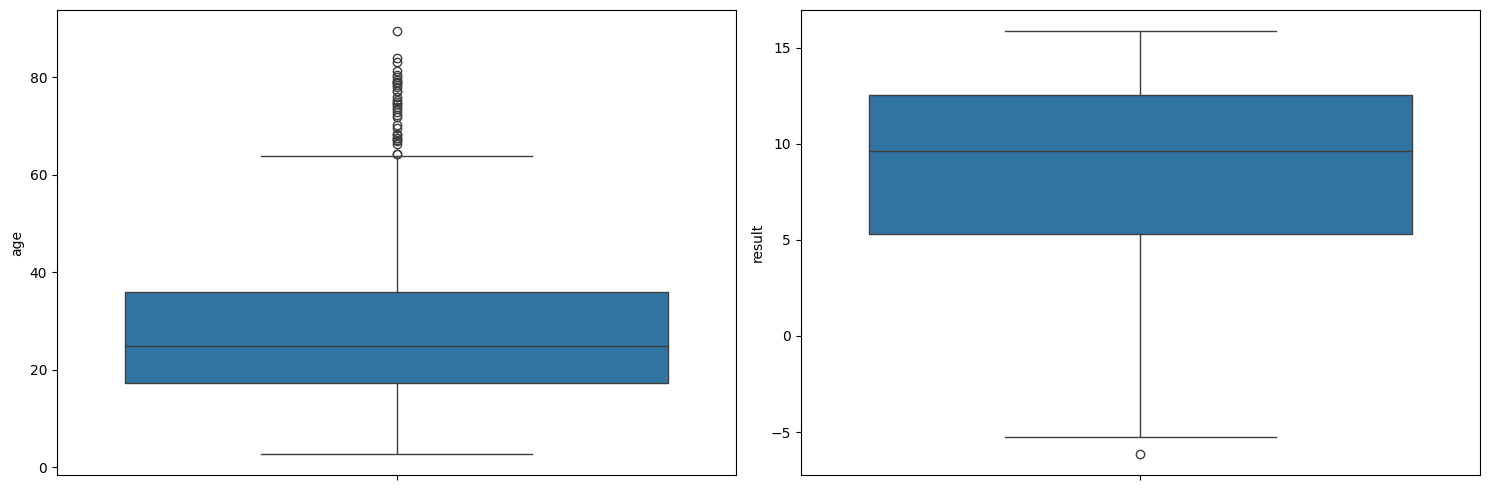

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['result']>-5]
df.shape


(798, 22)

In [ ]:

def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


In [ ]:
def add_feature(data):

  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

	  data['sum_score'] += data[col]

  data['ind'] = data['autism'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


In [ ]:
df['age'] = df['age'].apply(lambda x: np.log(x))


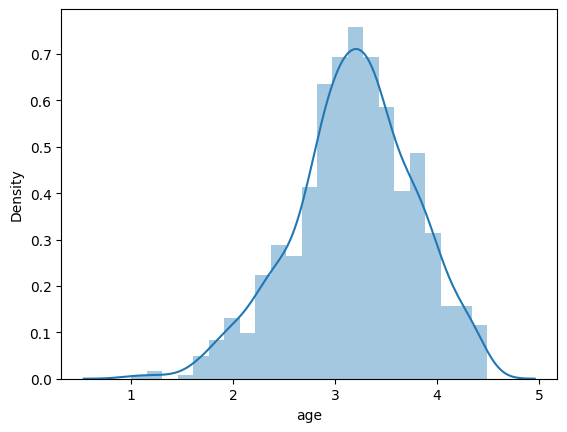

In [ ]:
sb.distplot(df['age'])
plt.show()


In [ ]:
def encode_labels(data):
  le = LabelEncoder()
  data = le.fit_transform(data)
  return data

for i in df.columns:
  if df[i].dtype!=int and df[i].dtype!=float:
    df[i] = encode_labels(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    int64  
 13  ethnicity        798 non-null    int64  
 14  jaundice         798 non-null    int64  
 15  autism           798 non-null    int64  
 16  country_of_res   798 non-null    int64  
 17  used_app_before  798 

In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'autism']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((1026, 20), (1026,))

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='sigmoid'),RandomForestClassifier()]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.8674463937621832
Validation Accuracy :  0.7741935483870966

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6993727598566308

SVC() : 
Training Accuracy :  0.8703703703703703
Validation Accu

In [ ]:
model = SVC(kernel='rbf')
model.fit(X,Y)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
kernels = ['rbf', 'sigmoid', 'poly']
for ker in kernels:
  param_grid = {'C': [0.1, 1, 10, 100, 1000],
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      'kernel': [ker]}

  grid = GridSearchCV(SVC(kernel=ker), param_grid, refit = True, verbose = 3)
  grid.fit(X, Y)
  grid_predictions = grid.predict(X_val)
  print(classification_report(Y_val, grid_predictions))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.869 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [ ]:
test = pd.read_csv('/content/test.csv')
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [ ]:
ints = []
objects = []
floats = []

for col in test.columns:
  if test[col].dtype == float:
	  floats.append(col)
  elif test[col].dtype == int:
	  ints.append(col)
  else:
	  objects.append(col)


In [ ]:


test['ageGroup'] = test['age'].apply(convertAge)


In [ ]:

test = add_feature(test)


In [ ]:

for i in test.columns:
  if test[i].dtype!=int and test[i].dtype!=float:
    test[i] = encode_labels(test[i])


In [ ]:
features = test.drop(removal, axis=1)
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
model = SVC(kernel='rbf')
model.fit(X,Y)

SVC()

In [ ]:
test['fin_col'] = model.predict(features)
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,autism,country_of_res,used_app_before,result,age_desc,relation,ageGroup,sum_score,ind,fin_col
0,1,1,1,0,0,1,1,0,0,1,...,0,14,0,12.399055,0,5,2,6,1,1
1,2,1,0,0,0,0,0,0,1,0,...,0,21,0,6.551598,0,5,3,2,0,0
2,3,1,1,1,0,1,1,0,1,1,...,0,10,0,3.180663,0,5,3,8,1,1
3,4,0,0,0,0,0,0,0,0,0,...,0,14,0,2.220766,0,5,3,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,17,0,7.252028,0,5,0,1,0,0


In [ ]:
dict = {0:'no', 1:'yes'}
test['Classification using SVC'] = test['fin_col'].map(dict)
test.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,country_of_res,used_app_before,result,age_desc,relation,ageGroup,sum_score,ind,fin_col,Classification using SVC
0,1,1,1,0,0,1,1,0,0,1,...,14,0,12.399055,0,5,2,6,1,1,yes
1,2,1,0,0,0,0,0,0,1,0,...,21,0,6.551598,0,5,3,2,0,0,no
2,3,1,1,1,0,1,1,0,1,1,...,10,0,3.180663,0,5,3,8,1,1,yes
3,4,0,0,0,0,0,0,0,0,0,...,14,0,2.220766,0,5,3,0,0,0,no
4,5,0,0,0,1,0,0,0,0,0,...,17,0,7.252028,0,5,0,1,0,0,no


In [ ]:
test.to_csv('Results_test.csv')